In [158]:
import pandas as pd

In [159]:
crime_large = pd.read_csv('../NYPD_Complaint_Data_Historic_2012_to_2016.csv')
crime_large.head(2)

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,553682872,01/01/2012,00:01:00,12/31/2012,00:01:00,20.0,05/03/2018,116,SEX CRIMES,168.0,...,M,NaN,40.784060,-73.975021,"(40.784059874, -73.975020513)",PATROL BORO MAN NORTH,NaN,<18,UNKNOWN,F
1,814073553,01/01/2012,00:01:00,01/01/2013,00:01:00,77.0,05/29/2018,104,RAPE,157.0,...,M,NaN,40.674583,-73.930222,"(40.674583308, -73.930221541)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,F


In [160]:
# columns with null data
crime_large.columns[crime_large.isnull().any()]

Index(['CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURISDICTION_CODE', 'PARKS_NM',
       'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [161]:
# reduce dataset size by removing unnecessary columns
print(f"before: {crime_large.shape}")
crime = crime_large[['CMPLNT_NUM', 
                     'CMPLNT_FR_DT', #'CMPLNT_FR_TM',
                     'CMPLNT_TO_DT', #'CMPLNT_TO_TM', 
                     'RPT_DT',            # report date
                     'ADDR_PCT_CD',       # precinct
                     'BORO_NM',           # borough
                     'OFNS_DESC',         # offence description
                     'CRM_ATPT_CPTD_CD',  # whether crime succeeded/intercepted
                     'LAW_CAT_CD',        # Level of offense: felony, misdemeanor, violation
                     'PREM_TYP_DESC',     # Specific description of premises e.g. garden / grocer
                     'Latitude', 'Longitude']]
print(f"after: {crime.shape}")

before: (2448211, 35)
after: (2448211, 12)


In [162]:
# cast data type to datetime
date_cols = ['CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'RPT_DT']
for col in date_cols:
    crime[col] = pd.to_datetime(crime[col], errors='coerce')

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [163]:
# check whether datecols are valid
crime[date_cols].isnull().any()

CMPLNT_FR_DT    False
CMPLNT_TO_DT     True
RPT_DT          False
dtype: bool

In [164]:
# remove those with null CMPLNT_TO_DT
print(f"before: {crime.shape}")
crime.dropna(subset=['CMPLNT_TO_DT'], inplace=True)
print(f"after: {crime.shape}")

before: (2448211, 12)
after: (1940498, 12)


/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
crime['CRIME_DURATION'] = crime.CMPLNT_TO_DT - crime.CMPLNT_FR_DT
crime.head(2)

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,Latitude,Longitude,CRIME_DURATION
0,553682872,2012-01-01,2012-12-31,2018-05-03,20.0,MANHATTAN,SEX CRIMES,COMPLETED,FELONY,RESIDENCE - PUBLIC HOUSING,40.784060,-73.975021,365 days
1,814073553,2012-01-01,2013-01-01,2018-05-29,77.0,BROOKLYN,RAPE,COMPLETED,FELONY,RESIDENCE - APT. HOUSE,40.674583,-73.930222,366 days


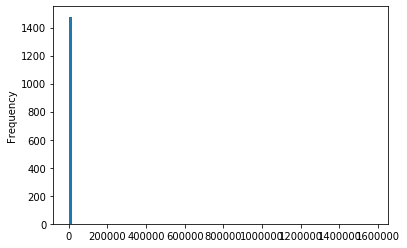

In [166]:
crime.CRIME_DURATION.value_counts().plot.hist(bins=100)

In [167]:
# 19 records with negative crime duration
len(crime[crime.CRIME_DURATION.dt.days<0])

19

In [168]:
# drop those rows with negative crime durations
crime.drop(crime[crime.CRIME_DURATION.dt.days<0].index, inplace=True)

/Users/cmvandev/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [169]:
crime.CRIME_DURATION.describe()

count                    1940479
mean      5 days 03:53:50.211717
std      48 days 13:33:01.943326
min              0 days 00:00:00
25%              0 days 00:00:00
50%              0 days 00:00:00
75%              0 days 00:00:00
max           2523 days 00:00:00
Name: CRIME_DURATION, dtype: object

In [170]:
for i in range(7):
    print(f'{round(len(crime[crime.CRIME_DURATION.dt.days<=i]) / len(crime), 2)}% of crimes take place within {i} days')

0.81% of crimes take place within 0 days
0.91% of crimes take place within 1 days
0.93% of crimes take place within 2 days
0.94% of crimes take place within 3 days
0.94% of crimes take place within 4 days
0.95% of crimes take place within 5 days
0.95% of crimes take place within 6 days


In [171]:
# crime.to_csv('data/NYPD_Complaint_Data_Historic_2013to2017_smaller.csv')

In [172]:
# take only crimes that last a day
crime_sample = crime[crime.CRIME_DURATION.dt.days == 0]
crime_sample.shape

(1573605, 13)

In [173]:
crime_sample.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,Latitude,Longitude,CRIME_DURATION
11,545939924,2012-01-01,2012-01-01,2018-03-24,110.0,QUEENS,SEX CRIMES,COMPLETED,MISDEMEANOR,RESIDENCE-HOUSE,40.745253,-73.870063,0 days
30,959113645,2012-01-01,2012-01-01,2012-01-01,73.0,BROOKLYN,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,STREET,40.663680,-73.912124,0 days
31,421552963,2012-01-01,2012-01-01,2012-01-01,104.0,QUEENS,PETIT LARCENY,COMPLETED,MISDEMEANOR,DEPARTMENT STORE,40.712362,-73.891225,0 days
33,864061201,2012-01-01,2012-01-01,2012-01-01,52.0,BRONX,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,STREET,40.880071,-73.885859,0 days
34,406817519,2012-01-01,2012-01-01,2012-01-01,18.0,MANHATTAN,MISCELLANEOUS PENAL LAW,COMPLETED,VIOLATION,HOTEL/MOTEL,40.762762,-73.979447,0 days


In [174]:
crime_sample.to_csv('../data/NYPD_One_Day_Crimes_2012to2016.csv')

### Crime Lat/Long to NTA

In [175]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import matplotlib.pylab as plt
import geopy

In [176]:
nta = gpd.read_file('../data/Neighborhood Tabulation Areas.geojson')
nta.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005018.7472,047,Borough Park,39247.2280737,Brooklyn,3,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,QN51,52488276.477,081,Murray Hill,33266.904811,Queens,4,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."
2,QN27,19726845.26,081,East Elmhurst,19816.7115378,Queens,4,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ..."
3,QN07,22887772.7683,081,Hollis,20976.3358374,Queens,4,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ..."
4,MN06,10647077.6122,061,Manhattanville,17040.6865482,Manhattan,1,"MULTIPOLYGON (((-73.94608 40.82126, -73.94640 ..."


In [177]:
# make sure lat long variables are numeric
crime_sample[['Latitude', 'Longitude']].dtypes 

Latitude     float64
Longitude    float64
dtype: object

In [178]:
# data cleaning, we wanna remove entries where lat long are null before we do spatial join
# check out how many rows with lat, long columns each as null
crime_sample[['Latitude', 'Longitude']].isnull().apply(pd.value_counts)

,Latitude,Longitude
False,1573540,1573540
True,65,65


In [179]:
# the offending 20 rows
crime_sample[crime_sample.Latitude.isnull()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,Latitude,Longitude,CRIME_DURATION
325380,418121578,2012-08-18,2012-08-18,2012-09-17,41.0,BRONX,SEX CRIMES,COMPLETED,MISDEMEANOR,OTHER,NaN,NaN,0 days
442936,553721561,2012-11-13,2012-11-13,2012-11-20,41.0,BRONX,SEX CRIMES,COMPLETED,MISDEMEANOR,OTHER,NaN,NaN,0 days
573114,873355026,2013-02-23,2013-02-23,2013-02-23,41.0,BRONX,SEX CRIMES,COMPLETED,MISDEMEANOR,OTHER,NaN,NaN,0 days
703443,631989915,2013-06-02,2013-06-02,2013-06-04,41.0,BRONX,RAPE,COMPLETED,FELONY,OTHER,NaN,NaN,0 days
793506,210615669,2013-08-04,2013-08-04,2013-08-07,41.0,BRONX,SEX CRIMES,COMPLETED,FELONY,OTHER,NaN,NaN,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400286,642961942,2016-11-22,2016-11-22,2016-11-22,41.0,BRONX,SEX CRIMES,COMPLETED,MISDEMEANOR,OTHER,NaN,NaN,0 days
2413185,417709920,2016-12-02,2016-12-02,2016-12-04,41.0,BRONX,SEX CRIMES,COMPLETED,FELONY,OTHER,NaN,NaN,0 days
2421596,870161243,2016-12-09,2016-12-09,2016-12-12,41.0,BRONX,SEX CRIMES,ATTEMPTED,FELONY,OTHER,NaN,NaN,0 days
2423012,296032210,2016-12-10,2016-12-10,2016-12-11,41.0,BRONX,SEX CRIMES,COMPLETED,MISDEMEANOR,OTHER,NaN,NaN,0 days


In [180]:
# drop the offending rows
crime_sample = crime_sample.dropna(subset=['Latitude', 'Longitude'])
crime_sample.shape # 20 fewer rows

(1573540, 13)

In [181]:
# Create crime geodataframe
crime_sample['geometry'] = crime_sample.apply(lambda crime_sample: Point((crime_sample.Longitude, crime_sample.Latitude)), axis=1)
crime_gdf = gpd.GeoDataFrame(crime_sample, geometry = 'geometry')

In [182]:
crime_gdf.head(2)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,Latitude,Longitude,CRIME_DURATION,geometry
11,545939924,2012-01-01,2012-01-01,2018-03-24,110.0,QUEENS,SEX CRIMES,COMPLETED,MISDEMEANOR,RESIDENCE-HOUSE,40.745253,-73.870063,0 days,POINT (-73.87006 40.74525)
30,959113645,2012-01-01,2012-01-01,2012-01-01,73.0,BROOKLYN,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,STREET,40.663680,-73.912124,0 days,POINT (-73.91212 40.66368)


In [183]:
crime_gdf.crs = nta.crs # ensure they are on the same CRS projection
crime_nta = gpd.sjoin(crime_gdf, nta, op="intersects")

In [184]:
crime_nta.head(2)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,...,CRIME_DURATION,geometry,index_right,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code
11,545939924,2012-01-01,2012-01-01,2018-03-24,110.0,QUEENS,SEX CRIMES,COMPLETED,MISDEMEANOR,RESIDENCE-HOUSE,...,0 days,POINT (-73.87006 40.74525),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
60,563246152,2012-01-01,2012-01-01,2012-01-01,110.0,QUEENS,PETIT LARCENY,COMPLETED,MISDEMEANOR,CHAIN STORE,...,0 days,POINT (-73.87545 40.73533),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4


In [185]:
crime_nta.shape

(1573438, 22)

In [186]:
# sanity check for spatial join
(crime_nta.BORO_NM == crime_nta.boro_name.str.upper()).value_counts()

# 5049 rows with different boroughs specified?

True     1568389
False       5049
dtype: int64

In [187]:
error_df = crime_nta[['CMPLNT_FR_DT', 'BORO_NM', 'boro_name']][~(crime_nta.BORO_NM == crime_nta.boro_name.str.upper())]
error_df.head()
# some instances where crime dataset doesn't specify borough
# other instances where crime dataset

,CMPLNT_FR_DT,BORO_NM,boro_name
439403,2012-11-10,MANHATTAN,Queens
448607,2012-11-17,MANHATTAN,Queens
988804,2013-12-22,MANHATTAN,Queens
2141891,2016-05-14,MANHATTAN,Queens
429144,2012-10-31,BRONX,Brooklyn


In [188]:
# num of rows where crime dataset's borough is diff from nta dataset's borough
num_diff_boro = len(error_df[~error_df.BORO_NM.isnull()])
print(f"num of rows with different/wrong boroughs={num_diff_boro}")
print(f"that's {num_diff_boro/len(crime_nta)}% of dataset")

num of rows with different/wrong boroughs=5024
that's 0.0031930079227780184% of dataset


In [189]:
# keep only consistent NTAs
crime_nta_1 = crime_nta[(crime_nta.BORO_NM == crime_nta.boro_name.str.upper())]
crime_nta_1.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,...,CRIME_DURATION,geometry,index_right,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code
11,545939924,2012-01-01,2012-01-01,2018-03-24,110.0,QUEENS,SEX CRIMES,COMPLETED,MISDEMEANOR,RESIDENCE-HOUSE,...,0 days,POINT (-73.87006 40.74525),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
60,563246152,2012-01-01,2012-01-01,2012-01-01,110.0,QUEENS,PETIT LARCENY,COMPLETED,MISDEMEANOR,CHAIN STORE,...,0 days,POINT (-73.87545 40.73533),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
330,888198452,2012-01-01,2012-01-01,2012-01-01,110.0,QUEENS,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,RESIDENCE - APT. HOUSE,...,0 days,POINT (-73.87668 40.74585),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
427,137420748,2012-01-01,2012-01-01,2012-01-03,110.0,QUEENS,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,STREET,...,0 days,POINT (-73.87471 40.74820),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
508,309275160,2012-01-01,2012-01-01,2012-02-05,110.0,QUEENS,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,RESIDENCE - APT. HOUSE,...,0 days,POINT (-73.87903 40.74276),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4


In [190]:
crime_nta_1.shape #5049 entries removed

(1568389, 22)

### Reformatting Crime Data to be Consistent with ACS Data

In [191]:
crime_nta_1.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,...,CRIME_DURATION,geometry,index_right,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code
11,545939924,2012-01-01,2012-01-01,2018-03-24,110.0,QUEENS,SEX CRIMES,COMPLETED,MISDEMEANOR,RESIDENCE-HOUSE,...,0 days,POINT (-73.87006 40.74525),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
60,563246152,2012-01-01,2012-01-01,2012-01-01,110.0,QUEENS,PETIT LARCENY,COMPLETED,MISDEMEANOR,CHAIN STORE,...,0 days,POINT (-73.87545 40.73533),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
330,888198452,2012-01-01,2012-01-01,2012-01-01,110.0,QUEENS,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,RESIDENCE - APT. HOUSE,...,0 days,POINT (-73.87668 40.74585),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
427,137420748,2012-01-01,2012-01-01,2012-01-03,110.0,QUEENS,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,STREET,...,0 days,POINT (-73.87471 40.74820),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4
508,309275160,2012-01-01,2012-01-01,2012-02-05,110.0,QUEENS,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,RESIDENCE - APT. HOUSE,...,0 days,POINT (-73.87903 40.74276),57,QN29,32675347.1604,081,Elmhurst,36711.3368893,Queens,4


In [192]:
crime_nta_reduced = crime_nta_1[['LAW_CAT_CD','ntaname']]

In [193]:
crime_nta_reduced.head()

,LAW_CAT_CD,ntaname
11,MISDEMEANOR,Elmhurst
60,MISDEMEANOR,Elmhurst
330,FELONY,Elmhurst
427,MISDEMEANOR,Elmhurst
508,MISDEMEANOR,Elmhurst


In [194]:
crime_nta_reduced = crime_nta_reduced.set_index('ntaname')

In [195]:
crime_nta_reduced.head()

,LAW_CAT_CD
ntaname,
Elmhurst,MISDEMEANOR
Elmhurst,MISDEMEANOR
Elmhurst,FELONY
Elmhurst,MISDEMEANOR
Elmhurst,MISDEMEANOR


In [196]:
# add dummy variables
crime_nta_reduced = pd.get_dummies(crime_nta_reduced)

In [197]:
crime_nta_reduced.head()

,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION
ntaname,,,
Elmhurst,0,1,0
Elmhurst,0,1,0
Elmhurst,1,0,0
Elmhurst,0,1,0
Elmhurst,0,1,0


In [198]:
# make pivot table
crime_totals = pd.pivot_table(crime_nta_reduced, values = ['LAW_CAT_CD_FELONY', 'LAW_CAT_CD_MISDEMEANOR', 'LAW_CAT_CD_VIOLATION'], index = ['ntaname'], aggfunc=np.sum)

In [199]:
crime_totals

,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION
ntaname,,,
Airport,99.0,186.0,7.0
Allerton-Pelham Gardens,752.0,1925.0,444.0
Annadale-Huguenot-Prince's Bay-Eltingville,431.0,1215.0,464.0
Arden Heights,263.0,785.0,324.0
Astoria,4002.0,8082.0,2211.0
...,...,...,...
park-cemetery-etc-Bronx,1121.0,2577.0,430.0
park-cemetery-etc-Brooklyn,1073.0,2020.0,323.0
park-cemetery-etc-Manhattan,1342.0,2722.0,507.0


In [200]:
# calculate total crime by nta
crime_totals['TOTAL_CRIME'] = crime_totals.LAW_CAT_CD_FELONY + crime_totals.LAW_CAT_CD_MISDEMEANOR + crime_totals.LAW_CAT_CD_VIOLATION

In [201]:
crime_totals.head()

,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,TOTAL_CRIME
ntaname,,,,
Airport,99.0,186.0,7.0,292.0
Allerton-Pelham Gardens,752.0,1925.0,444.0,3121.0
Annadale-Huguenot-Prince's Bay-Eltingville,431.0,1215.0,464.0,2110.0
Arden Heights,263.0,785.0,324.0,1372.0
Astoria,4002.0,8082.0,2211.0,14295.0


In [202]:
crime_totals.shape

(195, 4)

In [203]:
# sanity check
crime_nta_reduced[crime_nta_reduced.index == 'park-cemetery-etc-Staten Island']

,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION
ntaname,,,
park-cemetery-etc-Staten Island,1,0,0
park-cemetery-etc-Staten Island,1,0,0
park-cemetery-etc-Staten Island,0,0,1
park-cemetery-etc-Staten Island,0,1,0
park-cemetery-etc-Staten Island,0,1,0
park-cemetery-etc-Staten Island,0,0,1
park-cemetery-etc-Staten Island,0,0,1
park-cemetery-etc-Staten Island,0,1,0
park-cemetery-etc-Staten Island,1,0,0


### Normalizing Crime Data by NTA Population

In [204]:
# Load ACS demographic data
ACS_data = pd.read_csv("../data/ACS_merged_filtered.csv",index_col=0)

In [205]:
ACS_data.head()

,Population,PopUnder18,PopOver65,MedianAge,PopHispanic,PopNotHisp,PopWhite,PopBlack,PopAsian,PopOTHER,Income0_49,Income_50_99,Income_100_199,Income_200up,EduOther,GardenCounts
GeogName,,,,,,,,,,,,,,,,
Bath Beach,33163.0,7103.0,4888.0,38.3,5861.0,27302.0,14490.0,404.0,11975.0,433.0,4953.0,3426.0,2464.0,585.0,14146.0,0
Bay Ridge,79134.0,15110.0,12380.0,39.5,14134.0,65000.0,50197.0,1511.0,11515.0,1777.0,13710.0,9678.0,7324.0,2775.0,27422.0,0
Bedford,75318.0,22379.0,5816.0,29.1,14682.0,60636.0,26407.0,30566.0,2290.0,1373.0,15008.0,5975.0,4042.0,1034.0,28145.0,23
Bensonhurst East,64267.0,12773.0,10107.0,39.6,7923.0,56344.0,29894.0,531.0,24858.0,1061.0,11327.0,6456.0,3560.0,844.0,28860.0,1
Bensonhurst West,91646.0,19288.0,13071.0,37.8,13378.0,78268.0,39112.0,801.0,37132.0,1223.0,14741.0,8545.0,5392.0,1231.0,43161.0,2


In [206]:
ACS_pop = ACS_data[['Population', 'GardenCounts']]
#ACS_pop = ACS_pop.set_index('GeogName')
ACS_pop.head()

,Population,GardenCounts
GeogName,,
Bath Beach,33163.0,0
Bay Ridge,79134.0,0
Bedford,75318.0,23
Bensonhurst East,64267.0,1
Bensonhurst West,91646.0,2


In [207]:
# merge with crime totals
crime_merge = crime_totals.merge(ACS_pop, how='left', left_index=True, right_index = True)
crime_merge.head()

,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,TOTAL_CRIME,Population,GardenCounts
ntaname,,,,,,
Airport,99.0,186.0,7.0,292.0,0.0,0.0
Allerton-Pelham Gardens,752.0,1925.0,444.0,3121.0,32450.0,1.0
Annadale-Huguenot-Prince's Bay-Eltingville,431.0,1215.0,464.0,2110.0,28698.0,0.0
Arden Heights,263.0,785.0,324.0,1372.0,26482.0,0.0
Astoria,4002.0,8082.0,2211.0,14295.0,77252.0,1.0


In [208]:
crime_merge.shape

(195, 6)

In [209]:
# How many NTAs have zero population?
(crime_merge['Population'] == 0).value_counts()

False    193
True       2
Name: Population, dtype: int64

In [210]:
crime_merge['Population'].isnull().value_counts()

False    194
True       1
Name: Population, dtype: int64

In [211]:
crime_merge['Population'] == 0

ntaname
Airport                                        True
Allerton-Pelham Gardens                       False
Annadale-Huguenot-Prince's Bay-Eltingville    False
Arden Heights                                 False
Astoria                                       False
                                              ...  
park-cemetery-etc-Bronx                       False
park-cemetery-etc-Brooklyn                    False
park-cemetery-etc-Manhattan                   False
park-cemetery-etc-Queens                      False
park-cemetery-etc-Staten Island                True
Name: Population, Length: 195, dtype: bool

In [212]:
(crime_merge['Population'] < 0).value_counts()

False    195
Name: Population, dtype: int64

In [213]:
crime_merge = crime_merge[crime_merge.Population > 0]

In [214]:
crime_merge.shape

(192, 6)

In [215]:
crime_merge.head()

,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,TOTAL_CRIME,Population,GardenCounts
ntaname,,,,,,
Allerton-Pelham Gardens,752.0,1925.0,444.0,3121.0,32450.0,1.0
Annadale-Huguenot-Prince's Bay-Eltingville,431.0,1215.0,464.0,2110.0,28698.0,0.0
Arden Heights,263.0,785.0,324.0,1372.0,26482.0,0.0
Astoria,4002.0,8082.0,2211.0,14295.0,77252.0,1.0
Auburndale,557.0,713.0,258.0,1528.0,20609.0,0.0


In [216]:
crime_merge = crime_merge.rename(columns={"LAW_CAT_CD_FELONY": "FELONY", "LAW_CAT_CD_MISDEMEANOR": "MISDEMEANOR", "LAW_CAT_CD_VIOLATION": "VIOLATION"})
crime_merge.head()

,FELONY,MISDEMEANOR,VIOLATION,TOTAL_CRIME,Population,GardenCounts
ntaname,,,,,,
Allerton-Pelham Gardens,752.0,1925.0,444.0,3121.0,32450.0,1.0
Annadale-Huguenot-Prince's Bay-Eltingville,431.0,1215.0,464.0,2110.0,28698.0,0.0
Arden Heights,263.0,785.0,324.0,1372.0,26482.0,0.0
Astoria,4002.0,8082.0,2211.0,14295.0,77252.0,1.0
Auburndale,557.0,713.0,258.0,1528.0,20609.0,0.0


In [218]:
crime_merge['FELONY_norm'] = crime_merge.FELONY/crime_merge.Population
crime_merge['MISDEMEANOR_norm'] = crime_merge.MISDEMEANOR/crime_merge.Population
crime_merge['VIOLATION_norm'] = crime_merge.VIOLATION/crime_merge.Population
crime_merge['TOTAL_CRIME_norm'] = crime_merge.TOTAL_CRIME/crime_merge.Population
crime_merge.head()

,FELONY,MISDEMEANOR,VIOLATION,TOTAL_CRIME,Population,GardenCounts,FELONY_norm,MISDEMEANOR_norm,VIOLATION_norm,TOTAL_CRIME_norm
ntaname,,,,,,,,,,
Allerton-Pelham Gardens,752.0,1925.0,444.0,3121.0,32450.0,1.0,0.023174,0.059322,0.013683,0.096179
Annadale-Huguenot-Prince's Bay-Eltingville,431.0,1215.0,464.0,2110.0,28698.0,0.0,0.015018,0.042337,0.016168,0.073524
Arden Heights,263.0,785.0,324.0,1372.0,26482.0,0.0,0.009931,0.029643,0.012235,0.051809
Astoria,4002.0,8082.0,2211.0,14295.0,77252.0,1.0,0.051804,0.104619,0.028621,0.185044
Auburndale,557.0,713.0,258.0,1528.0,20609.0,0.0,0.027027,0.034597,0.012519,0.074142


### Saving to CSV

In [222]:
# save gdf as csv 
crime_merge.to_csv('../data/Crime_totals_normalized.csv') #normalized crime data
# crime_totals.to_file("../data/crime_NTA.geojson", driver='GeoJSON') # if we wanna save as geojson

### Exploratory Data Analysis
##### 1-day crimes from  2012-2016

In [220]:
crime_sample.shape # 1592482 number of records

(1573540, 14)

In [ ]:
crime_sample.columns

In [ ]:
ax = crime_sample.LAW_CAT_CD.value_counts().plot.pie(figsize=(5,5), title='Level of offences')

In [ ]:
crime_sample.CRM_ATPT_CPTD_CD.value_counts().plot.pie(figsize=(5,5), rot=90)

In [ ]:
# TODO: geocode lat,lon w NTAs
crime_sample.ADDR_PCT_CD.value_counts().plot.bar(figsize=(17, 4), title='Number of crimes by precincts')

In [ ]:
# types of crime
crime_sample.OFNS_DESC.value_counts().plot.bar(figsize=(17, 4), title='Number of crimes by offence description')

In [ ]:
crime_sample.BORO_NM.value_counts().plot.bar(color='purple', title='Number of crimes by borough')